In [1]:
import pysrm3 as p
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import sympy

C:\Users\Marius\AppData\Local\Temp/ipykernel_10196/1361900121.py:10: RuntimeWarning: divide by zero encountered in power
  y = float(ans[0]) * x ** -float(abs(ans[1]))


(0.7, 1.0)

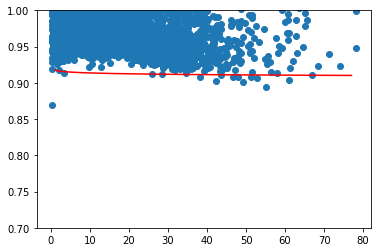

In [2]:
bas = '6229100'

whole_df = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info').get_whole()
ans,df,tmp1,tmp2 = p.xy_param(tmp_frame = whole_df)

#plt.scatter(df['Qn'],df['Qn+1'])

def fun(x):   
    y = float(ans[0]) * x ** -float(abs(ans[1]))
    return y

a = np.arange(int(min(df['Qn'])),int(max(df['Qn'])),1)
a_test = fun(a)

plt.scatter(df['Qn'],df['k'])
plt.plot(a_test, color = 'red')
plt.ylim((0.7,1))

#plt.scatter(df['Qn'],df['Qn+1'])

In [17]:
tmp1

,Qn,Qn+1,k
6552,0.282,0.245,0.868794
6547,0.323,0.297,0.919505
6546,0.348,0.323,0.928161
6561,0.257,0.240,0.933852
6540,0.470,0.439,0.934043
...,...,...,...
781,1.150,1.410,1.226087
6195,1.180,1.470,1.245763
6582,0.409,0.569,1.391198
6583,0.569,0.891,1.565905


X :1.1078115697277502,Y :0.0908149697747799,Cs :0.43,Cp :0.2699999999999999,ddf :0.6699999999999999


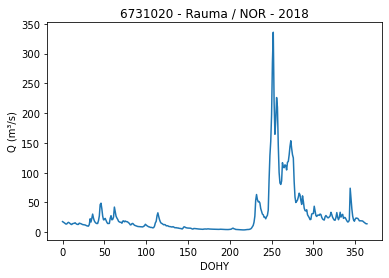

In [19]:
bas = '6731020'

year = 2018

a = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info',year = year).get_data()
b = p.Model(a)

#plt.plot(b[0])
plt.plot(b[1])
plt.title('{0} - Rauma / NOR - {1}'.format(bas,year))
plt.xlabel('DOHY')
plt.ylabel('Q (m³/s)')
plt.savefig('D:/Master_Thesis/Figures/NO_Hydropower.png', dpi = 300)

In [43]:
# Summarize Parameters
bas = '6731601'

p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info').param_summary()

,Stddev,Min,Mean,Max,Median
X,0.403,1.061,1.366,2.699,1.269
Y,0.071,0.026,0.092,0.313,0.076
Cs,0.116,0.290,0.609,0.890,0.610
Cp,0.163,0.169,0.519,0.769,0.549
ddf,0.094,0.429,0.579,0.749,0.590
R2,0.184,0.126,0.509,0.738,0.539


X :1.366,Y :0.092,Cs :0.609,Cp :0.519,ddf :0.579
X :1.1701543283809546,Y :0.0514677683352513,Cs :0.5100000000000001,Cp :0.7099999999999999,ddf :0.6499999999999999


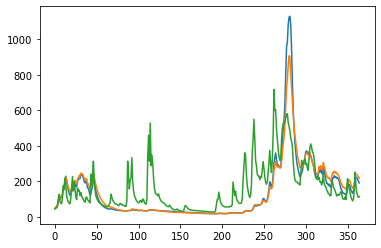

In [68]:
df = pd.read_csv('D:/Master_Thesis/Model/{0}/Parameters_{0}.csv'.format(bas))
df

a = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info', year = 2007).get_data()

param = [1.366,0.092,0.609,0.519,0.579]

b = p.Model_free(x = a, p = param) 
c = p.Model(a)

plt.plot(b[0])
plt.plot(c[0])
plt.plot(c[1])

X :1.024858,Y :0.028158,Cs :0.31,Cp :0.15,ddf :0.71


-0.1151746910622038

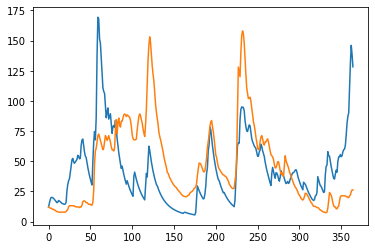

In [326]:
def volume_accuracy(measured,modeled):
    v_measure = np.sum(measured)
    v_model = np.sum(modeled)
    
    dv = ((v_measure - v_model)/ v_measure) * 100
    
    return dv

# p = list of parameters in Order: x,y,cs,cp,ddf

params = [1.024858,0.028158,0.31,0.15,0.71]

year = 2014

bas = '6854400'

a = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info',year = year).get_data()
b = p.Model_free(x = a,p = params)

plt.plot(b[0])
plt.plot(b[1])

p.r_squared_helper(b[0],b[1])
#volume_accuracy(b[1],b[0])

X :0.9979642144617408,Y :0.0263960286289775,Cs :0.6500000000000001,Cp :0.3099999999999999,ddf :0.5299999999999999
X :0.9563710762411072,Y :0.009277519629836,Cs :0.5300000000000001,Cp :0.35,ddf :0.5099999999999999
X :0.6160431370880887,Y :0.1160349326426513,Cs :0.05,Cp :0.15,ddf :0.8499999999999999
X :0.9120503821884036,Y :0.0041667183024132,Cs :0.31,Cp :0.2499999999999999,ddf :0.5499999999999999
X :0.9883736566464252,Y :0.0124527045728386,Cs :0.35,Cp :0.2099999999999999,ddf :0.69
X :0.9383058949808972,Y :0.0075819466874677,Cs :0.17,Cp :0.1899999999999999,ddf :0.59
X :0.9614298146285388,Y :0.0159920771507423,Cs :0.15,Cp :0.1899999999999999,ddf :0.8299999999999998
X :0.9496171783800144,Y :0.0051099104941228,Cs :0.33,Cp :0.03,ddf :0.6499999999999999
X :0.9160761279445768,Y :0.0006972414989843,Cs :0.4100000000000001,Cp :0.1299999999999999,ddf :0.6499999999999999
X :1.0028165644330127,Y :0.0367898301856233,Cs :0.5300000000000001,Cp :0.01,ddf :0.59
X :0.9542301867707936,Y :0.0101764187213655

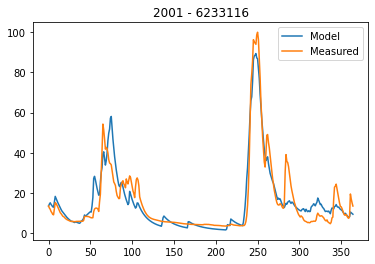

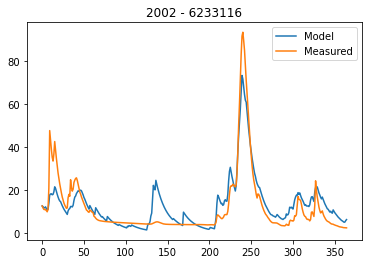

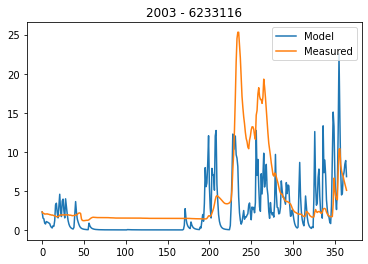

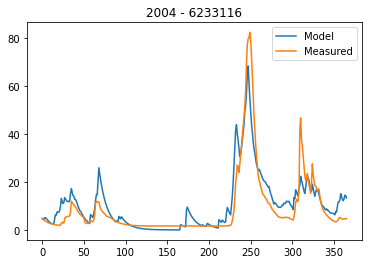

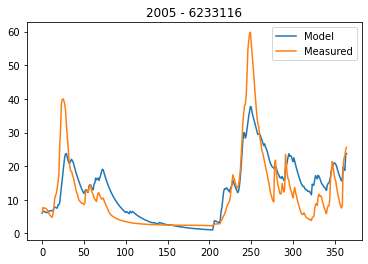

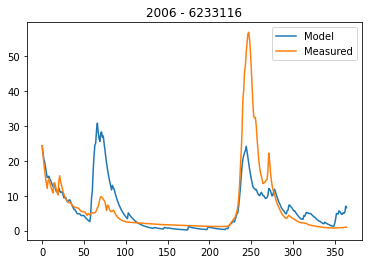

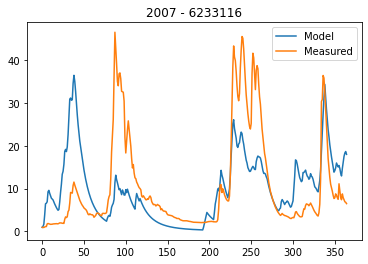

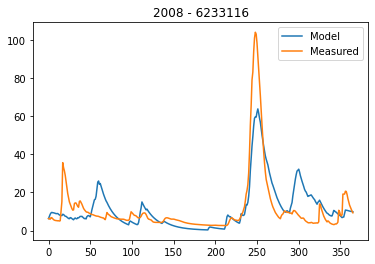

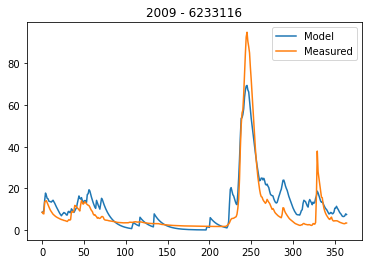

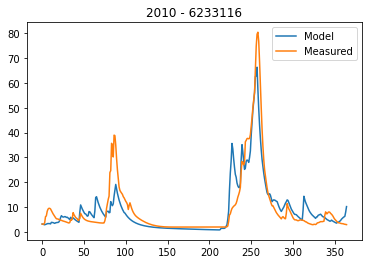

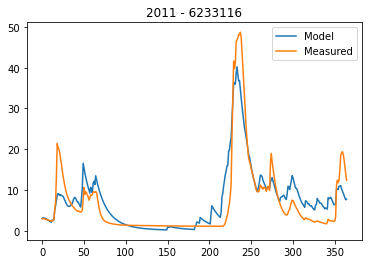

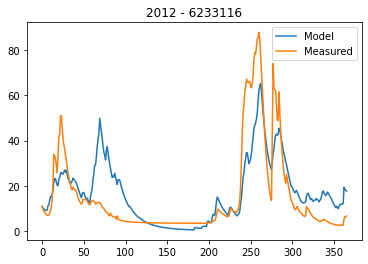

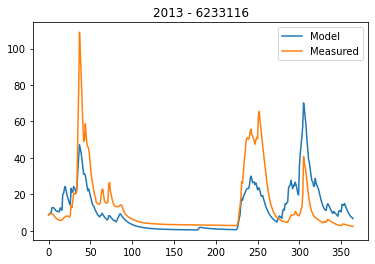

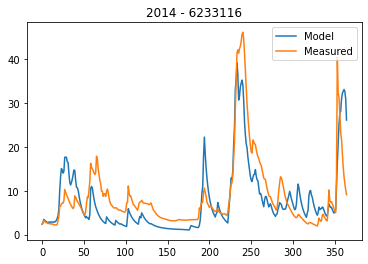

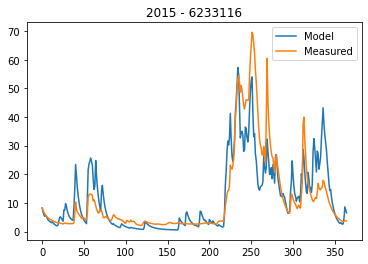

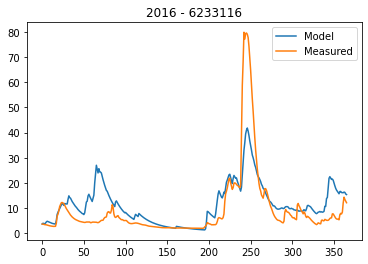

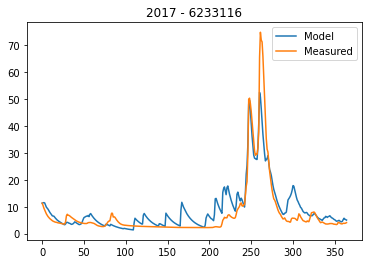

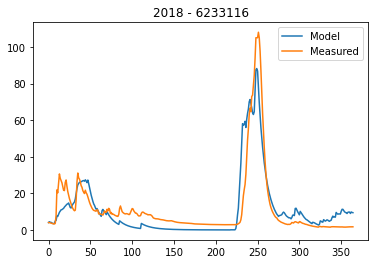

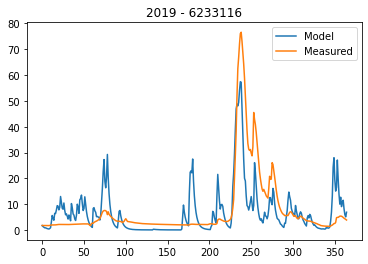

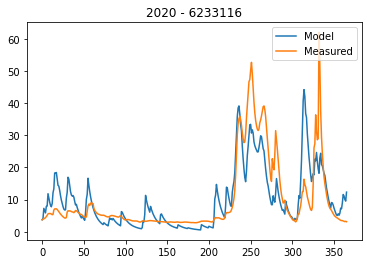

In [23]:
years = range(2001,2021)
for year in years:
    
    a = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info',year = year).get_data()
    b = p.Model(a, Tcrit = 1, Tlapse = -0.65)
    
    plt.figure()
    plt.plot(b[0], label = 'Model')
    plt.plot(b[1], label = 'Measured')
    plt.title('{0} - {1}'.format(year,bas))
    plt.legend(loc="upper right")


In [1006]:
years = range(2010,2021)

for year in years:
    a = p.Setup_Model(basin = '244', path = 'D:/Zackenberg_Innolab/Fr.Saale/Daten', info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info',year = year).get_data()
    b = p.Model(a)
    
    plt.figure()
    plt.title('Franconian Saale '+str(year))
    plt.ylabel('Q (m³/s)')
    plt.xlabel('DOHY')
    plt.plot(b[0],'--',color = 'red', label = 'Model')
    plt.plot(b[1],'--',color = 'green', label = 'Measured')
    plt.legend(loc="upper right")
    plt.savefig('C:/Users/Marius/Desktop/Figures/Saale' + str(year) + '.png', dpi = 300)

plt.show()


FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'D:/Zackenberg_Innolab/Fr.Saale/Daten'

In [43]:
import pysrm_legacy as p_l
import matplotlib.pyplot as plt 
import numpy as np

d = []
years = range(2010,2021)

for year in years:

    a = p_l.Setup_Model(basin = '244', path = 'D:/Zackenberg_Innolab/Fr_Saale/Daten', info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                     stations = 'Meteo_Stations_Info',year = year).get_data()
    b = p_l.Model(a)

    # Get Sum Volume Difference
    t = (np.nansum(b[1]) - np.nansum(b[0])) / np.nansum(b[1]) * -100
    d.append(t)

X :0.9650543663606376,Y :0.0180889073694132,Cs :0.45,Cp :0.1699999999999999,ddf :0.7299999999999999
X :1.09676490023355,Y :0.0993615254679325,Cs :0.6700000000000002,Cp :0.1699999999999999,ddf :0.5499999999999999
X :0.993740691961922,Y :0.0598687412690576,Cs :0.05,Cp :0.2499999999999999,ddf :0.99
X :0.9352742529621196,Y :0.0464246337915077,Cs :0.13,Cp :0.3699999999999999,ddf :0.7099999999999999
X :1.0472225150725682,Y :0.0622877210476322,Cs :0.05,Cp :0.1899999999999999,ddf :0.99
X :1.0654695843550943,Y :0.1068836369401256,Cs :0.05,Cp :0.3299999999999999,ddf :0.99
X :0.9680661771194246,Y :0.0782402991908661,Cs :0.05,Cp :0.2699999999999999,ddf :0.99
X :1.169171195994128,Y :0.1626907698591824,Cs :0.05,Cp :0.1699999999999999,ddf :0.99
X :0.904625472078714,Y :0.0210057054236958,Cs :0.17,Cp :0.35,ddf :0.7699999999999999
X :1.0291831494830757,Y :0.0984198857234557,Cs :0.05,Cp :0.2499999999999999,ddf :0.99
X :0.9356321381627069,Y :0.0553989242487192,Cs :0.05,Cp :0.2699999999999999,ddf :0.99


In [44]:
d

[-0.5330728875456835,
 -19.692127288981016,
 -12.612321894235103,
 -11.907322037083192,
 -26.561453717185447,
 -22.79477941147573,
 -24.9113514093674,
 -40.5832051026427,
 -2.4877530322373422,
 -16.85464353691693,
 -11.863647920915476]

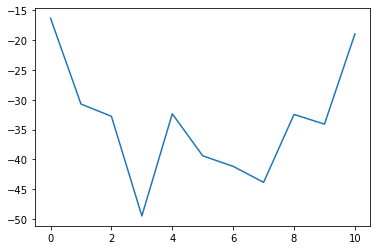

In [35]:
plt.plot(d)

X :0.906051225174082,Y :0.0301304138112806,Cs :0.9900000000000002,Cp :0.99,ddf :0.6299999999999999


-12.899955216140155

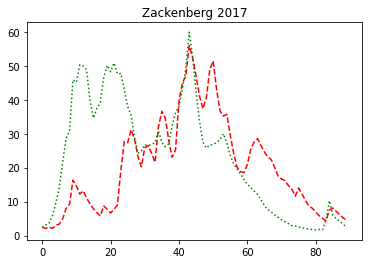

In [41]:
import pysrm_legacy as p_l
import matplotlib.pyplot as plt 
import numpy as np


a = p_l.Setup_Model(basin = '0001', path = 'D:/Zackenberg_Innolab/Model', info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
             stations = 'Meteo_Stations_Info',year = 2018, multi = False, start_day = '-06-02', end_day = '-10-23').get_data()

b = p_l.Model(x=a)

plt.plot(b[0],'--',color = 'red')
plt.plot(b[1],':',color = 'green')
plt.title('Zackenberg 2017')

# Get Sum Volume Difference
(np.nansum(b[1]) - np.nansum(b[0])) / np.nansum(b[1]) * -100

In [32]:
os.chdir('C:/Users/Marius/Desktop')


time_pd = pd.date_range('2018-06-20','2018-09-17')

modeled = b[0]
measured = b[1]

df_model = pd.DataFrame(data = {
    'Time' : time_pd,
    'Model': modeled
})

df_measure = pd.DataFrame(data = {
    'Time' : time_pd,
    'Model': measured
})

df_dummy = pd.DataFrame(data = {
    'Time' : pd.date_range('2018-01-01','2018-12-31'),
    'Q': 0
})

df_model.to_csv('Model_2018.csv', index = False)
df_measure.to_csv('Measure_2018.csv', index = False)
df_dummy.to_csv('Dummy_2018.csv', index = False)
df_dummy.to_csv('Dummy2_2018.csv', index = False)

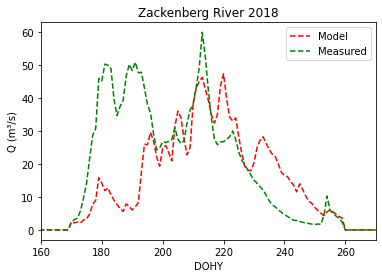

In [62]:
os.chdir('C:/Users/Marius/Desktop/Figures')


zackenberg_model = pd.read_csv('Model_2018.csv')
zackenberg_measure = pd.read_csv('Measure_2018.csv')

plt.figure()
plt.plot(zackenberg_model['Q'],'--',color = 'red', label = 'Model')
plt.plot(zackenberg_measure['Q'],'--',color = 'green', label = 'Measured')
plt.legend(loc="upper right")
plt.title('Zackenberg River 2018')
plt.ylabel('Q (m³/s)')
plt.xlabel('DOHY')
plt.xlim(160,270)
plt.savefig('C:/Users/Marius/Desktop/Figures/Zackenberg_2018.png', dpi = 300)

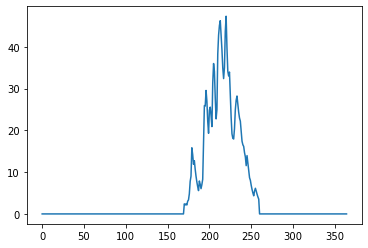

In [44]:
zackenberg_model = pd.read_csv('Model_2018.csv')
zackenberg_measure = pd.read_csv('Measure_2018.csv')

plt.plot(zackenberg_model['Q'])

X :0.906051225174082,Y :0.0301304138112806,Cs :0.9900000000000002,Cp :0.99,ddf :0.6299999999999999


Text(0.5, 1.0, 'Zackenberg 2018')

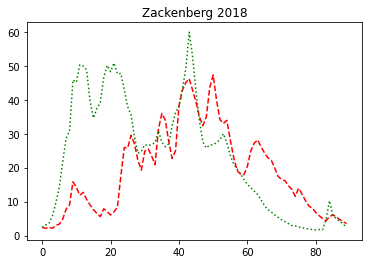

In [10]:
    a = p.Setup_Model(basin = '0001', path = 'D:/Zackenberg_Innolab/Model', info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info',year = 2018, multi = False, start_day = '-06-02', end_day = '-10-23').get_data()
    b = p.Model(a)
    
    plt.plot(b[0],'--',color = 'red')
    plt.plot(b[1],':',color = 'green')
    plt.title('Zackenberg 2018')

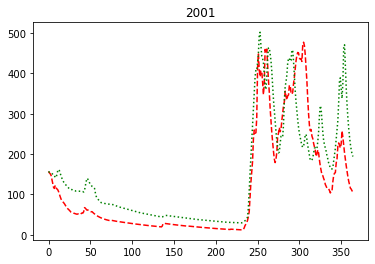

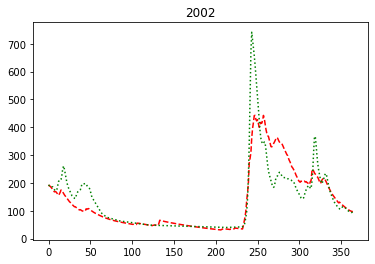

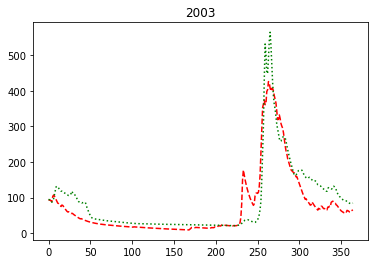

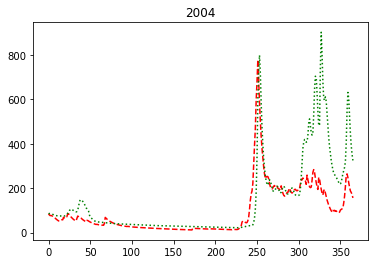

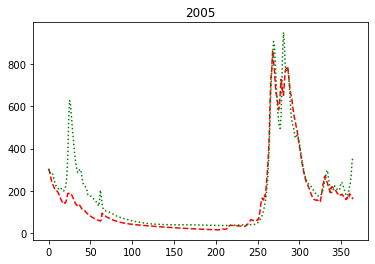

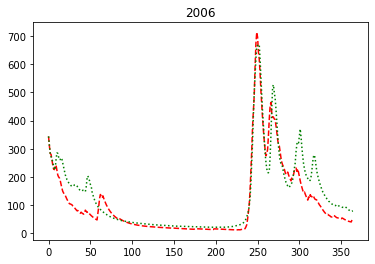

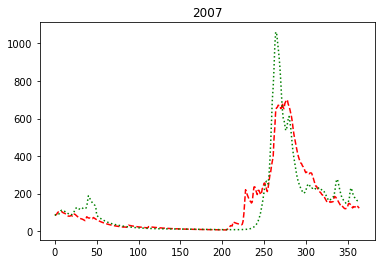

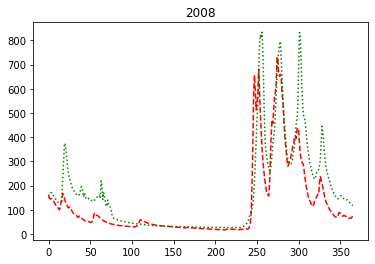

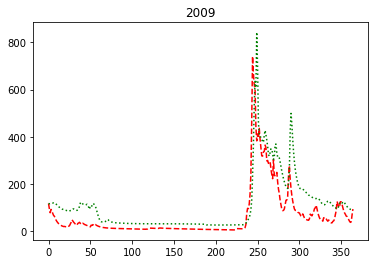

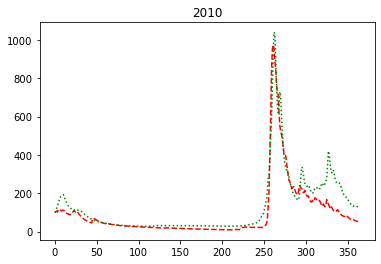

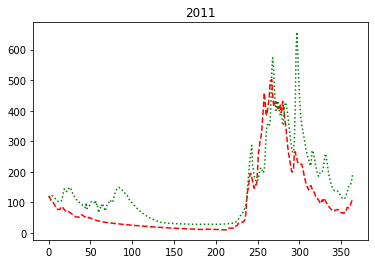

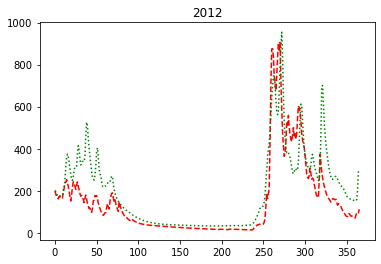

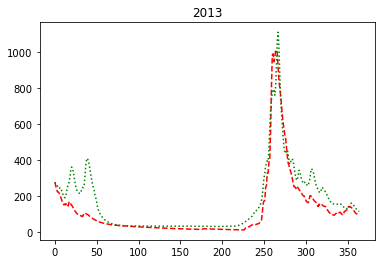

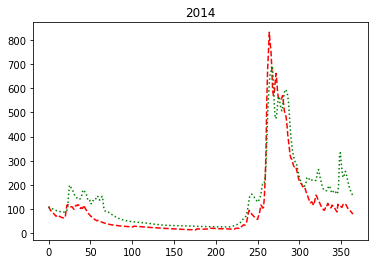

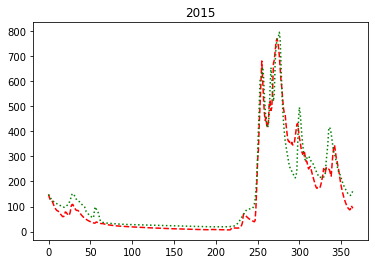

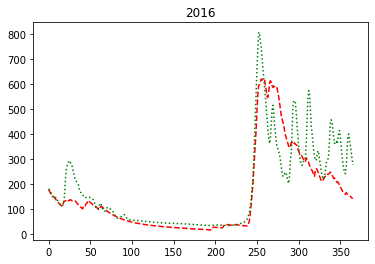

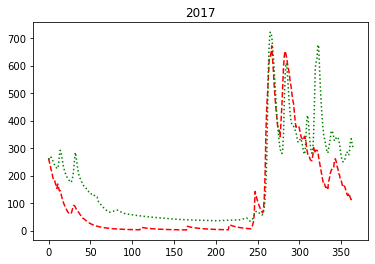

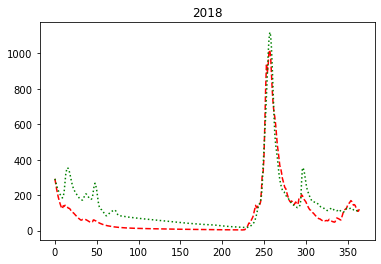

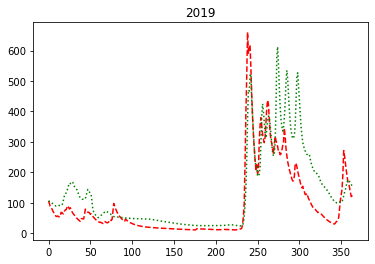

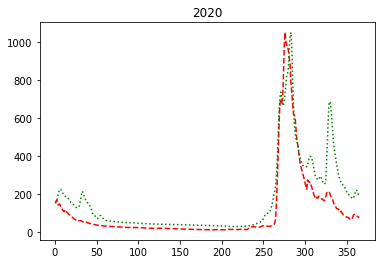

In [13]:
os.chdir('C:/Users/Marius/Desktop/Model_Output/')

basin = '2012'
years = range(2001,2021)

for year in years:
    output = pd.read_csv('Output_' + str(basin) + '_' + str(year) + '.csv', encoding = 'unicode_escape')

    plt.figure()
    plt.title(year)
    plt.plot(output['model'],'--',color = 'red')
    plt.plot(output['data'],':',color = 'green')

plt.show()


In [257]:
import math
import os
import glob
import re
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import scipy.signal



def xy_param(tmp_frame, min_ratio = 0.1, max_ratio = 0.1, x_guess = 2, y_guess = 0.1):
    """ Helper function, used to get the optimal x/y parameters for a basin in each year of the
        optimizing process.
        min_ratio = determines the search radius at lower boundary of the recession plot. 
        max_ratio = determines the search radius at upper boundary of the recession plot.
        x_guess = first guess value for x, needed for nonlinear solver
        y_guess = first guess value for y, needed for nonlinear solver
        Output: optimal x/y combination for a given year 
    """
    runoff = {'Qn' : tmp_frame['Runoff'],
              'Qn+1' : tmp_frame['Runoff']
             }
    # Create a Dataframe
    df = pd.DataFrame(runoff, columns = ['Qn', 'Qn+1'])
    # Shift runoff values by one
    df['Qn+1'] = df['Qn+1'].shift(-1)
    # Drop the last NaN row
    df = df[:-1]
    # Calculate recession coefficient K
    df['k'] = (df['Qn+1'] / df['Qn'])
    
    
    # Get Qn/Qn+1 tuples with minimal k (lower boundary)
    # to solve the nonlinear equation system
    min_qn = min(df['Qn'])
    
    delta_min = min_ratio * min_qn
    if delta_min <= 1:
        delta_min = 1
    elif delta_min >= 5:
        delta_min = 5
    else:
        delta_min = delta_min
    
    max_qn = max(df['Qn'])
    
    delta_max = max_ratio * max_qn
    if delta_max <= 5:
        delta_max = 5
    else:
        delta_max = delta_max
    
    # Sort by k to get the lower boundary (true recession)
    tmp1 = df[df['Qn'] <= min_qn + delta_min ]
    tmp1 = tmp1.sort_values(by = 'k')
    tmp2 = df[df['Qn'] >= max_qn - delta_max]
    tmp2 = tmp2.sort_values(by = 'k')
    
    # Get inputs for the nonlinear equation system
    k1 = tmp1.iloc[0,2]
    k2 = tmp2.iloc[0,2]
    q1 = tmp1.iloc[0,0]
    q2 = tmp2.iloc[0,0]
    
    # Solve equation system for x/y
    xn = sp.Symbol('xn')
    yn = sp.Symbol('yn')
    ans = sp.nsolve([xn * q1 ** -yn - k1, xn * q2 ** -yn - k2], [xn,yn], [x_guess,y_guess])
    
    return ans

In [258]:
start_date = '2005-09-01'
end_date = '2006-08-31'

data = pd.read_csv('D:/Master_Thesis/Model/6854590/Data_6854590.csv')
tmp_frame = data[(data["Date"] >= start_date) & (data["Date"] <= end_date)]

tmp_frame

,Date,T.mean,Precipitation,Runoff,Snow_A
1826,2005-09-01,13.194147,0.000000,11.1,0.00080
1827,2005-09-02,13.623041,0.000000,10.7,0.00020
1828,2005-09-03,14.296014,0.006790,10.4,0.00000
1829,2005-09-04,11.015405,0.001067,10.4,0.02030
1830,2005-09-05,10.572107,0.054238,10.4,0.01300
...,...,...,...,...,...
2186,2006-08-27,15.756128,0.018173,10.1,0.00170
2187,2006-08-28,15.115198,0.067447,9.4,0.00120
2188,2006-08-29,14.367487,1.544247,9.4,0.00100
2189,2006-08-30,14.437646,0.011560,9.4,0.00040


In [260]:
ans = xy_param(tmp_frame)

In [264]:
math.fabs(ans[1])

0.02187078653280491